## Chi-square

Compute chi-squared stats between each non-negative feature and class. 

- This score should be used to evaluate categorical variables in a classification task.

In [1]:
# import libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# to determine the chi square value
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [2]:
# load data
data = pd.read_csv('titanic.csv')
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
data.shape

(1309, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [6]:
# the categories that will be considered from this dataset are pclass, sex and embarked
# pclass is already a numeric type and is ordinal, so no encoding is needed
data['pclass'].value_counts()

3    709
1    323
2    277
Name: pclass, dtype: int64

In [7]:
# lets encode the rest of the variables
data['sex'].value_counts()

male      843
female    466
Name: sex, dtype: int64

In [9]:
data['sex'] = data['sex'].map({'male': 1, 'female':0})

In [11]:
# for embarked
data['embarked'].value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [13]:
ordinal = {k:i for i, k in enumerate(data['embarked'].unique(), 0)}
ordinal

{'S': 0, 'C': 1, nan: 2, 'Q': 3}

In [14]:
data['embarked'] = data['embarked'].map(ordinal)

In [15]:
# separate the data into train and test
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data[['pclass', 'sex', 'embarked']],
    data['survived'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((916, 3), (393, 3))

In [16]:
# calculate the chi2 p_value between each of the variables
# and the target

# chi2 returns 2 arrays, one contains the F-Scores which are then
# evaluated against the chi2 distribution to obtain the pvalue.
# The pvalues are in the second array

f_score = chi2(X_train, y_train)

# the 2 arrays of features
f_score

(array([27.18283095, 95.93492132,  8.51621324]),
 array([1.85095118e-07, 1.18722647e-22, 3.51996172e-03]))

In [18]:
# 1) let's capture the p_values (in the second array, remember python indexes at 0) in a pandas Series
# 2) add the variable names in the index
# 3) order the variables based on their fscore

p_values = pd.Series(f_score[1])
p_values.index = X_train.columns


<AxesSubplot:>

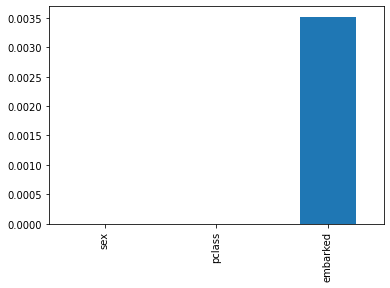

In [19]:
p_values.sort_values(inplace = True)
p_values.plot.bar()

In [20]:
p_values

sex         1.187226e-22
pclass      1.850951e-07
embarked    3.519962e-03
dtype: float64

Contrarily to MI, where we were interested in the higher MI values, for the chi2, the smaller the p_value the more significant the feature is to predict the target.

Thus, from the result above, Sex is the most important feature, as it has the smallest p-value.

In this demo, we used chi2 to determine the predictive value of 3 categorical variables only. If the dataset contained several categorical variables, we could then combine this procedure with SelectKBest or SelectPercentile, as we did in the previous notebook, to select the top k features, or the features in the top n percentile, based on the chi2 p-values.

Let's select the top 1 feature for the demo: